In [1]:
import math
import random

from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

In [4]:
raw_data = []
with open('./gr.txt') as f:
    header = next(f)
    for line in f:
        values = line[:-1].split(',')
        raw_data.append((
            float(values[1]) - float(values[2]) + random.uniform(-1, 1) * 0.02,
            float(values[1]) + 5.0 + 5.0 * math.log10(float(values[3]) / 1000.0) + random.uniform(-1, 1) * 0.3
        ))

In [5]:
len(raw_data)

39235

In [6]:
x_scale = max([i[0] for i in raw_data]) - min([i[0] for i in raw_data])
y_scale = max([i[1] for i in raw_data]) - min([i[1] for i in raw_data])

In [7]:
def dist(x: float, y: float) -> float:
    return math.sqrt((x / x_scale) ** 2 + (y / y_scale) ** 2)


data = []
THRESHOLD = 0.004

raw_data.sort(key=lambda x: x[0])

for rd in tqdm(raw_data):
    is_redundant = False
    for i in range(len(data)):
        d = data[len(data) - 1 - i]
        if (rd[0] - d[0]) / x_scale > THRESHOLD:
            break
        if dist(rd[0] - d[0], rd[1] - d[1]) < THRESHOLD:
            is_redundant = True
            break
    if not is_redundant:
        data.append(rd)

In [8]:
len(data)

6260

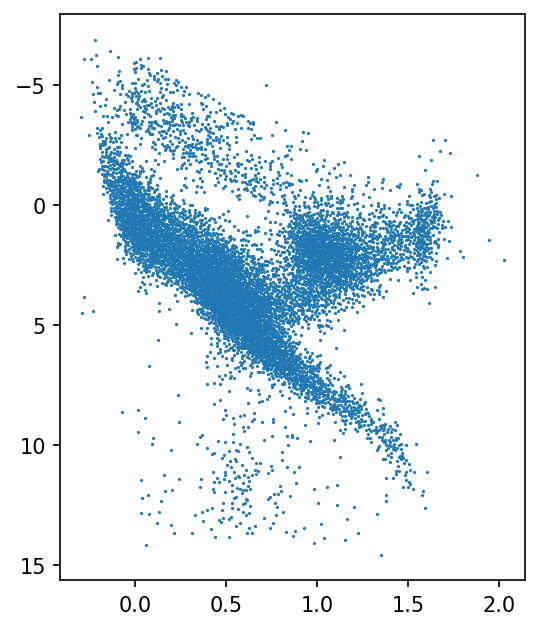

In [9]:
plt.figure(figsize=(4, 5), dpi=150)
plt.scatter([i[0] for i in data[:]], [i[1] for i in data[:]], s=0.3)
plt.gca().invert_yaxis()
plt.show()

In [10]:
with open('../../data/gr-plot.csv', 'w') as f:
    f.write('BV,M\n')
    for d in data[:6500]:
        f.write('{:.3f}'.format(d[0]) + ',' + '{:.3f}'.format(d[1]) + '\n')

In [11]:
!head ../../data/gr-plot.csv

BV,M
-0.294,-3.662
-0.290,4.491
-0.282,-6.076
-0.278,3.827
-0.250,-2.912
-0.242,-6.096
-0.236,-5.128
-0.231,-4.641
-0.230,4.431
